# Exploring K-Fold using Confirmed Cases
#### Rebecca McLenigan, Tale Research, Machine Learning Hackathon

### This notebook explores COVID19 health data from Massachusetts with a focus on patients who have been tested for COVID-19. The data includes "Detected", as well as "Not detected".

### Data used for the analysis includes:
            1) Race
            2) Ethnicity
            3) Gender
            4) Weight in Kg
            5) SARS Test Result 
            6) Underlying Condition: Diabetes
            7) Days Hospitalized

# * Help: 
# I thought I was doing well until I started running the models and then noticed they were taking too long. I started looking at my data more thoroughly and realized I had too much. Issues include multiple rows for the test result, which I knew about. The other issue was multiple rows for body weight. I decided to create a function to just get one; however, I have been unable to get it to work. The function is not being called and I don't understand why.
# I really want to be able to get body weight because it is a measured value and I know that will work better with the models. Also, if I can figure out how to get body weight, then I will be able to get other measurements as well.
# Thanks for your help.

In [1]:
import pandas as pd
from datetime import datetime
from datetime import date
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# Load data and create subsets
### Observation Data contains Covid-19 Test Results

In [2]:
observations_df = pd.read_csv('C:\\Projects\\healthdata\\train\\observations.csv')
covid19_status_df = observations_df.loc[(observations_df['CODE'] == '94531-1')]

In [3]:
covid19_status_df.shape

(105548, 8)

In [4]:
covid19_status_df.rename(columns={'DATE':'TEST_DATE'}, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [ ]:
### ***Issue here because patients can have multiple test results.

In [5]:
# look for duplicates in covid19_status_df
# duplicateDFRow = covid19_status_df[covid19_status_df.duplicated(['TEST_DATE', 'PATIENT', 'ENCOUNTER'])]
# covid19_status_df.drop_duplicates(subset=['TEST_DATE', 'PATIENT', 'ENCOUNTER'], keep = 'first', inplace = True)
duplicateDFRow = covid19_status_df[covid19_status_df.duplicated(['PATIENT', 'ENCOUNTER'])]
covid19_status_df.drop_duplicates(subset=['PATIENT', 'ENCOUNTER'], keep = 'first', inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [6]:
covid19_status_df.shape

(92165, 8)

In [7]:
covid19_status_df['VALUE'].value_counts()

Detected (qualifier value)        73697
Not detected (qualifier value)    18468
Name: VALUE, dtype: int64

In [8]:
covid19_status_df['CODE'].value_counts()

94531-1    92165
Name: CODE, dtype: int64

In [9]:
covid19_status_df.head(10)

,TEST_DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
44,2020-03-10,30fb496e-b8d3-4d36-8e50-86acb3d1a223,a703222d-f88a-45ef-be97-b3636357b5bc,94531-1,SARS-CoV-2 RNA Pnl Resp NAA+probe,Not detected (qualifier value),NaN,text
93,2020-03-11,afa2680f-7f73-46d9-b0cd-2cf3db49724b,00bee8c8-40e5-433e-ba85-2125f133e5eb,94531-1,SARS-CoV-2 RNA Pnl Resp NAA+probe,Detected (qualifier value),NaN,text
127,2020-02-23,26e5d262-6cdc-4274-a5cd-d7fd439e35f9,08727d55-6b17-4312-9e90-1174f54b9c22,94531-1,SARS-CoV-2 RNA Pnl Resp NAA+probe,Detected (qualifier value),NaN,text
602,2020-03-03,90031c21-e8a4-416e-b60b-23e871ee62dc,630ee0a3-2bb2-434a-a7cb-b37c7f8a43cb,94531-1,SARS-CoV-2 RNA Pnl Resp NAA+probe,Detected (qualifier value),NaN,text
1036,2020-03-10,26e5d262-6cdc-4274-a5cd-d7fd439e35f9,e6ad9f78-fa0e-431a-b9b6-5d127a594261,94531-1,SARS-CoV-2 RNA Pnl Resp NAA+probe,Not detected (qualifier value),NaN,text
1458,2020-03-22,90031c21-e8a4-416e-b60b-23e871ee62dc,d068a77c-abcf-4c5e-a8b9-e74cbdbfe099,94531-1,SARS-CoV-2 RNA Pnl Resp NAA+probe,Not detected (qualifier value),NaN,text
1497,2020-03-10,0ac2e031-ab88-41f9-ac5d-d7d588952222,6faa29bc-9e80-4386-840e-b9c5ad5644ef,94531-1,SARS-CoV-2 RNA Pnl Resp NAA+probe,Detected (qualifier value),NaN,text
1535,2020-03-09,45138fb4-dc79-4aec-ba78-7a012d3edca7,eed09e0e-a9ba-4623-82c7-9e28d90812bc,94531-1,SARS-CoV-2 RNA Pnl Resp NAA+probe,Detected (qualifier value),NaN,text
1548,2020-03-06,fba0823a-d6fc-402f-a6c3-9394f54b1870,7f7afa4d-7ead-44d5-bd1c-6755ed26b5d5,94531-1,SARS-CoV-2 RNA Pnl Resp NAA+probe,Detected (qualifier value),NaN,text
1564,2020-02-11,93ef4d47-2a1e-4af1-b792-96a6077b75e0,1e1a70a6-f832-40db-856e-d140d1a608a8,94531-1,SARS-CoV-2 RNA Pnl Resp NAA+probe,Detected (qualifier value),NaN,text


In [10]:
groupby_result_value = covid19_status_df.groupby(['PATIENT', 'VALUE'])['PATIENT'].count()
pd.set_option('display.max_rows', 5000)
print(groupby_result_value)

PATIENT                               VALUE                         
0000641f-540d-408b-ad16-93c2de94f446  Detected (qualifier value)        1
00019696-c3de-4e1f-8ca8-0df186aa988c  Detected (qualifier value)        1
                                      Not detected (qualifier value)    1
000371b6-0650-4946-9659-d504b7107ca6  Detected (qualifier value)        1
0003bf3b-f6f7-4ca9-b34a-db784779089a  Detected (qualifier value)        1
                                                                       ..
fffe583e-9fe6-4583-8fa8-0bc12a38406a  Detected (qualifier value)        1
fffebdf1-2b3c-4b65-8556-7735e3c0e682  Detected (qualifier value)        1
                                      Not detected (qualifier value)    1
ffff00ca-5bee-4b40-a234-8db911a00321  Detected (qualifier value)        1
ffffb4ad-927c-4df5-9f00-c888687113a7  Detected (qualifier value)        1
Name: PATIENT, Length: 90484, dtype: int64


### Observation data for body weight since January 1, 2020

# * This is my new code, but for some reason the function is not being called, I don't understand why. I hardcode a test case to help me solve it, but so far I have been unable to.

In [13]:
def get_weight(row):
    code = '29463-7'
    print("function called")
    row = observations_df.loc[row['DATE'], row['PATIENT'], row['ENCOUNTER'], row[code]]
    if row[row.duplicated(['DATE', 'PATIENT', 'ENCOUNTER'])] == True:
        row.drop_duplicates(subset=['DATE', 'PATIENT', 'ENCOUNTER'], keep = 'first', inplace = True)
        
    weight = row.iloc['VALUE']
    print('weight : ', weight)
    return weight

test_df = covid19_status_df[(covid19_status_df['TEST_DATE']=='2020-03-10') & (covid19_status_df['PATIENT']=='30fb496e-b8d3-4d36-8e50-86acb3d1a223') & (covid19_status_df['ENCOUNTER']=='a703222d-f88a-45ef-be97-b3636357b5bc')]
print(test_df)
test_return_df = test_df.apply(lambda x: get_weight, axis=1)
# covid19_status_df['BW_VALUE'] = covid19_status_df.apply(lambda x: get_weight, axis=1)
#
# df.loc[df.A.eq(11) & df.B.eq(22), 'C'].item()
# print(df.loc[df['D'] == 14]['A'].values)
#covid19_status_df['BW_VALUE'] = observations_df.loc[observations_df.DATE.eq(covid19_status_df['TEST_DATE']) & 
#                                observations_df.PATIENT.eq(covid19_status_df['PATIENT']) & 
#                                observations_df.ENCOUNTER.eq(covid19_status_df['ENCOUNTER']) &
#                                observations_df.CODE.eq('29463-7'), 'VALUE']
#

     TEST_DATE                               PATIENT  \
44  2020-03-10  30fb496e-b8d3-4d36-8e50-86acb3d1a223   

                               ENCOUNTER     CODE  \
44  a703222d-f88a-45ef-be97-b3636357b5bc  94531-1   

                          DESCRIPTION                           VALUE UNITS  \
44  SARS-CoV-2 RNA Pnl Resp NAA+probe  Not detected (qualifier value)   NaN   

    TYPE  
44  text  


In [11]:
covid19_status_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92165 entries, 44 to 20655264
Data columns (total 8 columns):
TEST_DATE      92165 non-null object
PATIENT        92165 non-null object
ENCOUNTER      92165 non-null object
CODE           92165 non-null object
DESCRIPTION    92165 non-null object
VALUE          92165 non-null object
UNITS          0 non-null object
TYPE           92165 non-null object
dtypes: object(8)
memory usage: 6.3+ MB


In [14]:
test_df

,TEST_DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
44,2020-03-10,30fb496e-b8d3-4d36-8e50-86acb3d1a223,a703222d-f88a-45ef-be97-b3636357b5bc,94531-1,SARS-CoV-2 RNA Pnl Resp NAA+probe,Not detected (qualifier value),NaN,text


In [18]:
covid19_status_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92165 entries, 44 to 20655264
Data columns (total 9 columns):
TEST_DATE      92165 non-null object
PATIENT        92165 non-null object
ENCOUNTER      92165 non-null object
CODE           92165 non-null object
DESCRIPTION    92165 non-null object
VALUE          92165 non-null object
UNITS          0 non-null object
TYPE           92165 non-null object
AGE            92165 non-null object
dtypes: object(9)
memory usage: 7.0+ MB


In [19]:
covid19_status_df.head()

,TEST_DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE,AGE
44,2020-03-10,30fb496e-b8d3-4d36-8e50-86acb3d1a223,a703222d-f88a-45ef-be97-b3636357b5bc,94531-1,SARS-CoV-2 RNA Pnl Resp NAA+probe,Not detected (qualifier value),NaN,text,<function get_weight at 0x000001BC4189C828>
93,2020-03-11,afa2680f-7f73-46d9-b0cd-2cf3db49724b,00bee8c8-40e5-433e-ba85-2125f133e5eb,94531-1,SARS-CoV-2 RNA Pnl Resp NAA+probe,Detected (qualifier value),NaN,text,<function get_weight at 0x000001BC4189C828>
127,2020-02-23,26e5d262-6cdc-4274-a5cd-d7fd439e35f9,08727d55-6b17-4312-9e90-1174f54b9c22,94531-1,SARS-CoV-2 RNA Pnl Resp NAA+probe,Detected (qualifier value),NaN,text,<function get_weight at 0x000001BC4189C828>
602,2020-03-03,90031c21-e8a4-416e-b60b-23e871ee62dc,630ee0a3-2bb2-434a-a7cb-b37c7f8a43cb,94531-1,SARS-CoV-2 RNA Pnl Resp NAA+probe,Detected (qualifier value),NaN,text,<function get_weight at 0x000001BC4189C828>
1036,2020-03-10,26e5d262-6cdc-4274-a5cd-d7fd439e35f9,e6ad9f78-fa0e-431a-b9b6-5d127a594261,94531-1,SARS-CoV-2 RNA Pnl Resp NAA+probe,Not detected (qualifier value),NaN,text,<function get_weight at 0x000001BC4189C828>


# ***** This was the way I was doing it originally until I realized my data was not correct, I think I was getting multiple values for some data.

In [11]:
# bodywt_df = observations_df[(observations_df.set_index(['DATE','PATIENT','ENCOUNTER']).index.isin(covid19_status_df.set_index(['TEST_DATE','PATIENT','ENCOUNTER']).index)) & (observations_df['CODE'] == '29463-7')]
bodywt_df = observations_df[(observations_df['CODE'] == '29463-7') & (observations_df.set_index(['DATE','PATIENT','ENCOUNTER']).index.isin(covid19_status_df.set_index(['TEST_DATE','PATIENT','ENCOUNTER']).index))]

In [14]:
bodywt_df.shape

(72357, 8)

In [16]:
bodywt_df.head(100)

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
41,2020-03-10,30fb496e-b8d3-4d36-8e50-86acb3d1a223,a703222d-f88a-45ef-be97-b3636357b5bc,29463-7,Body Weight,81.9,kg,numeric
83,2020-03-11,afa2680f-7f73-46d9-b0cd-2cf3db49724b,00bee8c8-40e5-433e-ba85-2125f133e5eb,29463-7,Body Weight,73.8,kg,numeric
117,2020-02-23,26e5d262-6cdc-4274-a5cd-d7fd439e35f9,08727d55-6b17-4312-9e90-1174f54b9c22,29463-7,Body Weight,88.5,kg,numeric
589,2020-03-03,90031c21-e8a4-416e-b60b-23e871ee62dc,630ee0a3-2bb2-434a-a7cb-b37c7f8a43cb,29463-7,Body Weight,71.2,kg,numeric
1494,2020-03-10,0ac2e031-ab88-41f9-ac5d-d7d588952222,6faa29bc-9e80-4386-840e-b9c5ad5644ef,29463-7,Body Weight,90.1,kg,numeric
1532,2020-03-09,45138fb4-dc79-4aec-ba78-7a012d3edca7,eed09e0e-a9ba-4623-82c7-9e28d90812bc,29463-7,Body Weight,72.6,kg,numeric
1545,2020-03-06,fba0823a-d6fc-402f-a6c3-9394f54b1870,7f7afa4d-7ead-44d5-bd1c-6755ed26b5d5,29463-7,Body Weight,103.8,kg,numeric
1561,2020-02-11,93ef4d47-2a1e-4af1-b792-96a6077b75e0,1e1a70a6-f832-40db-856e-d140d1a608a8,29463-7,Body Weight,97.6,kg,numeric
1575,2020-03-05,ff524e84-ef48-4c59-8e16-ff28514271a1,93fbf46a-c078-4998-b55b-be1642086c5b,29463-7,Body Weight,56.7,kg,numeric
1597,2020-03-12,5c6dd9dd-effb-4ba6-a059-a60579b86ee1,79706a1a-3e72-4944-98d1-ab9972303d83,29463-7,Body Weight,86.8,kg,numeric


In [17]:
bodywt_df['CODE'].value_counts()

29463-7    72357
Name: CODE, dtype: int64

In [18]:
bodywt_df.rename(columns={'VALUE':'BW_VALUE', 'UNITS':'BW_UNITS'}, inplace=True)

In [19]:
# look for duplicate data in body weight data frame
duplicateDFRow = bodywt_df[bodywt_df.duplicated()]

In [20]:
duplicateDFRow

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BW_VALUE,BW_UNITS,TYPE
28962,2020-03-06,1abbe0e5-10d7-44e9-9fa7-3f32195d9899,48da38bc-9872-4938-9367-0e173b0aa62a,29463-7,Body Weight,69.0,kg,numeric
463157,2020-03-07,c8746d4b-4cfe-4c10-86da-a521ce75977a,a06eb23f-844a-4460-830d-9976b47f6f76,29463-7,Body Weight,105.5,kg,numeric
480249,2020-02-27,766dd2b2-c0ac-4fc1-89bb-746d8ab9a6ce,b2e239b8-c7f5-4ec5-b1ee-b5712b47f780,29463-7,Body Weight,74.6,kg,numeric
519413,2020-03-11,96476e55-5918-499c-a7a5-da89e089e68b,8b925777-d552-4cfe-8da7-bb264b7fe22f,29463-7,Body Weight,82.7,kg,numeric
522695,2020-02-14,b84d58a4-b9ff-44dd-94bc-fa8b457c69fd,de4e1cea-cb17-4cab-b9cb-465ba45a9879,29463-7,Body Weight,86.6,kg,numeric
544742,2020-02-25,67413433-6ca7-4994-95a8-daee063623c7,056dd640-35d1-42e6-b02c-ddc130772c2b,29463-7,Body Weight,90.5,kg,numeric
550679,2020-03-04,d3a80970-2fe5-44c8-95fc-e8e1d9043459,1af3c3b2-1dcf-4e95-9761-210ebca45aac,29463-7,Body Weight,90.9,kg,numeric
661376,2020-02-27,44a6ea78-765f-477e-9f0b-cac539a82594,78d5e36e-bde0-47be-ad86-7c0f6e519f8a,29463-7,Body Weight,87.6,kg,numeric
911650,2020-03-09,146465d7-b0f9-44d1-aa8b-ab85d97b2de3,2c764bbe-c755-491b-86ae-73d293e7336e,29463-7,Body Weight,80.7,kg,numeric
943882,2020-03-09,0408c063-6d64-41ef-8b7b-115911abd519,91571d50-e336-4d2a-947e-9f3f474b620e,29463-7,Body Weight,106.6,kg,numeric


In [21]:
bodywt_df.drop_duplicates(subset=['DATE', 'PATIENT', 'ENCOUNTER'], keep = 'first', inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
bodywt_df.shape

(72175, 8)

### Patient Data 

In [23]:
patients_df = pd.read_csv('C:\\Projects\\healthdata\\train\\patients.csv')
patients_subset_df = pd.DataFrame([patients_df.Id, patients_df.BIRTHDATE, patients_df.DEATHDATE, patients_df.MARITAL, patients_df.RACE, patients_df.ETHNICITY, patients_df.GENDER]).transpose()
patients_tested_covid19_df = patients_subset_df.loc[(patients_subset_df['Id'].isin(covid19_status_df['PATIENT']))]

In [24]:
patients_tested_covid19_df.shape

(75417, 7)

#### Merge columns to covid19_patients_tested_df for patients body weight and units measured

In [25]:
patients_tested_covid19_df = pd.merge(patients_tested_covid19_df, bodywt_df[['BW_VALUE', 'BW_UNITS', 'PATIENT']], how='left', left_on='Id', right_on='PATIENT')
patients_tested_covid19_df.drop(columns='PATIENT', inplace = True)

In [26]:
patients_tested_covid19_df.shape

(76012, 9)

In [28]:
patients_tested_covid19_df.head(100

,Id,BIRTHDATE,DEATHDATE,MARITAL,RACE,ETHNICITY,GENDER,BW_VALUE,BW_UNITS
0,30fb496e-b8d3-4d36-8e50-86acb3d1a223,1981-09-11,NaN,M,white,nonhispanic,M,81.9,kg
1,afa2680f-7f73-46d9-b0cd-2cf3db49724b,1978-06-16,NaN,M,white,nonhispanic,F,73.8,kg
2,26e5d262-6cdc-4274-a5cd-d7fd439e35f9,1989-09-05,NaN,S,white,nonhispanic,M,88.5,kg
3,90031c21-e8a4-416e-b60b-23e871ee62dc,1983-07-24,NaN,M,white,nonhispanic,F,71.2,kg
4,0ac2e031-ab88-41f9-ac5d-d7d588952222,1996-02-17,NaN,NaN,black,nonhispanic,M,90.1,kg
5,45138fb4-dc79-4aec-ba78-7a012d3edca7,1960-06-08,NaN,M,white,hispanic,F,72.6,kg
6,fba0823a-d6fc-402f-a6c3-9394f54b1870,1981-04-04,NaN,S,white,nonhispanic,M,103.8,kg
7,93ef4d47-2a1e-4af1-b792-96a6077b75e0,1984-08-14,NaN,M,white,nonhispanic,M,97.6,kg
8,ff524e84-ef48-4c59-8e16-ff28514271a1,1998-06-17,NaN,NaN,white,nonhispanic,F,56.7,kg
9,5c6dd9dd-effb-4ba6-a059-a60579b86ee1,1976-01-27,NaN,S,asian,nonhispanic,M,86.8,kg


#### Calculate Age for each patient, use DEATHDATE if not null, else use today's date.

In [24]:
def calculate_age(born, death):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    if pd.isnull(death):
        today = date.today()
    else:        
        today = datetime.strptime(death, "%Y-%m-%d").date()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

patients_tested_covid19_df['AGE'] = patients_tested_covid19_df.apply(lambda x: calculate_age(x.BIRTHDATE, x.DEATHDATE), axis=1)

### Merge covid19_status_df with patient_tested_covid19_df for test result data.

In [25]:
# Added test_date
patients_tested_covid19_df = pd.merge(patients_tested_covid19_df, covid19_status_df[['TEST_DATE','VALUE','PATIENT']], how='left', left_on='Id', right_on='PATIENT')
patients_tested_covid19_df.drop(columns='PATIENT', inplace = True)
patients_tested_covid19_df.rename(columns={'VALUE':'TEST_RESULT'}, inplace=True)
patients_tested_covid19_df.loc[(patients_tested_covid19_df['TEST_RESULT'].str.contains('Detected')),'TRESULT_VALUE'] = 1
patients_tested_covid19_df.loc[(patients_tested_covid19_df['TEST_RESULT'].str.contains('Not detected')),'TRESULT_VALUE'] = 0
# patients_tested_covid19_df.loc[(patients_tested_covid19_df.ETHNICITY == "hispanic"),'ETHNICITY'] = 1

## Encounters Data: Contains Hospitalizations

In [26]:
encounters_df = pd.read_csv('C:\\Projects\\healthdata\\train\\encounters.csv')

#### Create DataFrame with only COVID-19 hospitalizations.
#### Create a subset DataFrame that only contains the following columns: Id, START, STOP, PATIENT, CODE, DESCRIPTION, REASONCODE, REASONDESCRIPTION.

In [27]:
covid19_hosp_df = encounters_df.loc[(encounters_df['REASONCODE'] == 840539006)] 
covid19_hosp_subset_df = pd.DataFrame([covid19_hosp_df.Id, covid19_hosp_df.START, covid19_hosp_df.STOP, covid19_hosp_df.PATIENT, covid19_hosp_df.CODE, covid19_hosp_df.DESCRIPTION, covid19_hosp_df.REASONCODE, covid19_hosp_df.REASONDESCRIPTION]).transpose()

#### Insert column containing number of days hospitalized into the COVID-19 hospital dataframe.

In [28]:
covid19_hosp_subset_df['START'] = pd.to_datetime(covid19_hosp_subset_df['START'])
covid19_hosp_subset_df['STOP'] = pd.to_datetime(covid19_hosp_subset_df['STOP'])
covid19_hosp_subset_df.insert(3, 'DAYSHOSPITALIZED', (covid19_hosp_subset_df['STOP'] - covid19_hosp_subset_df['START']))
patients_tested_covid19_df = pd.merge(patients_tested_covid19_df, covid19_hosp_subset_df[['DAYSHOSPITALIZED', 'PATIENT']], how='left', left_on='Id', right_on='PATIENT')
patients_tested_covid19_df.drop(columns='PATIENT', inplace = True)
patients_tested_covid19_df['DAYSHOSPITALIZED'] = pd.to_numeric(patients_tested_covid19_df['DAYSHOSPITALIZED'].dt.days, downcast='integer')
patients_tested_covid19_df['DAYSHOSPITALIZED'] = patients_tested_covid19_df['DAYSHOSPITALIZED'].fillna(0)

## Conditions Data - contains diabetes data

In [29]:
conditions_df = pd.read_csv('C:\\Projects\\healthdata\\train\\conditions.csv')

#### Create subset containing patients with diabetes 

In [30]:
diabetes_status_df = conditions_df.loc[(conditions_df['CODE'] == 44054006)]

#### Merge Conditions DESCRIPTION column with covid patient data

In [31]:
patients_tested_covid19_df = pd.merge(patients_tested_covid19_df, diabetes_status_df[['DESCRIPTION', 'PATIENT']], how='left', left_on='Id', right_on='PATIENT')
patients_tested_covid19_df.drop(columns='PATIENT', inplace = True)

In [32]:
patients_tested_covid19_df.isnull().sum().sort_values(ascending = False)

DEATHDATE           107773
DESCRIPTION          95058
MARITAL               9229
BW_UNITS              5885
BW_VALUE              5885
DAYSHOSPITALIZED         0
TRESULT_VALUE            0
TEST_RESULT              0
TEST_DATE                0
AGE                      0
GENDER                   0
ETHNICITY                0
RACE                     0
BIRTHDATE                0
Id                       0
dtype: int64

In [33]:
patients_tested_covid19_df.DESCRIPTION.value_counts()

Diabetes    27518
Name: DESCRIPTION, dtype: int64

In [34]:
patients_tested_covid19_df.shape

(122576, 15)

#### Add column to covid19_patients_df to track patients who have Diabetes: '1' = Diabetes, '0' = Does Not have Diabetes

In [25]:
patients_tested_covid19_df["DIABETES"] = patients_tested_covid19_df["DESCRIPTION"].apply(lambda x: 0 if pd.isnull(x) else 1)

# Data Visualization Analysis

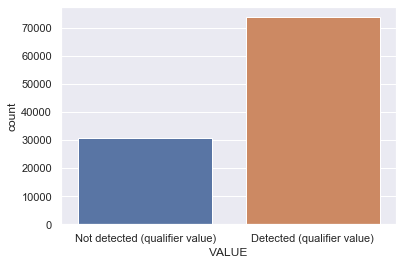

In [26]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="VALUE", data=covid19_status_df)

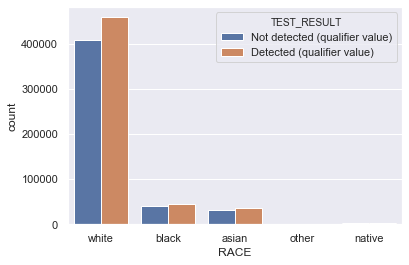

In [27]:
ax = sns.countplot(x="RACE", hue = "TEST_RESULT", data=patients_tested_covid19_df)

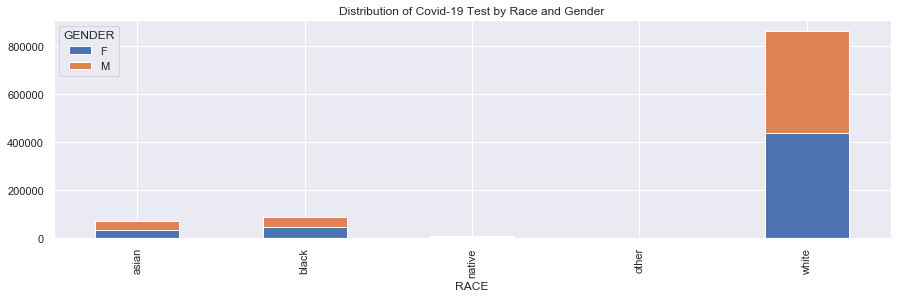

In [28]:
patients_tested_covid19_data = patients_tested_covid19_df.sort_values(by='RACE')
groupby_race = patients_tested_covid19_data.groupby('RACE').size()
groupby_race_gender = patients_tested_covid19_data.groupby(['RACE', 'GENDER'])['RACE'].count().unstack('GENDER').fillna(0)
groupby_race_gender[['F', 'M']].plot.bar(title = 'Distribution of Covid-19 Test by Race and Gender', stacked=True, figsize=(15,4))

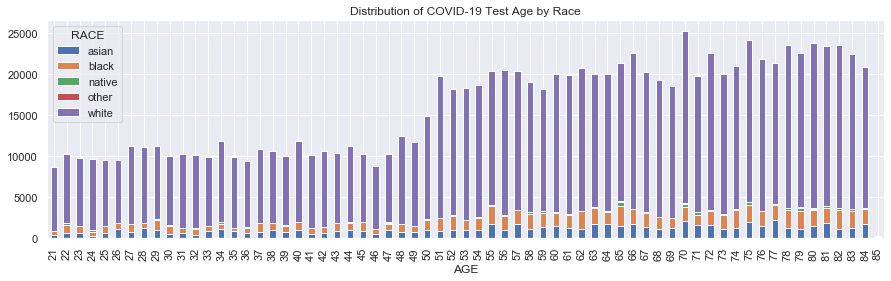

In [30]:
patients_tested_covid19_age_data = patients_tested_covid19_df.sort_values(by='AGE')
groupby_age = patients_tested_covid19_age_data.groupby('AGE').size()
groupby_age_race = patients_tested_covid19_age_data.groupby(['AGE', 'RACE'])['AGE'].count().unstack('RACE').fillna(0)
groupby_age_race[['asian', 'black', 'native', 'other' ,'white']].plot.bar(title = 'Distribution of COVID-19 Test Age by Race', stacked=True, figsize=(15,4))

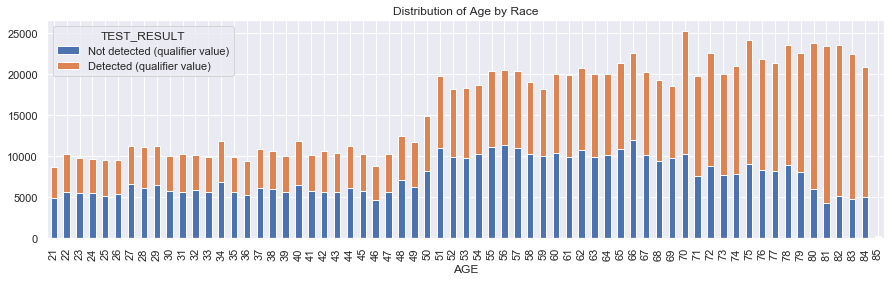

In [31]:
patients_tested_covid19_age_data = patients_tested_covid19_df.sort_values(by='AGE')
groupby_age = patients_tested_covid19_age_data.groupby('AGE').size()
groupby_age_result = patients_tested_covid19_age_data.groupby(['AGE', 'TEST_RESULT'])['AGE'].count().unstack('TEST_RESULT')
groupby_age_result[['Not detected (qualifier value)', 'Detected (qualifier value)']].plot.bar(title = 'Distribution of Age by Race', stacked=True, figsize=(15,4))

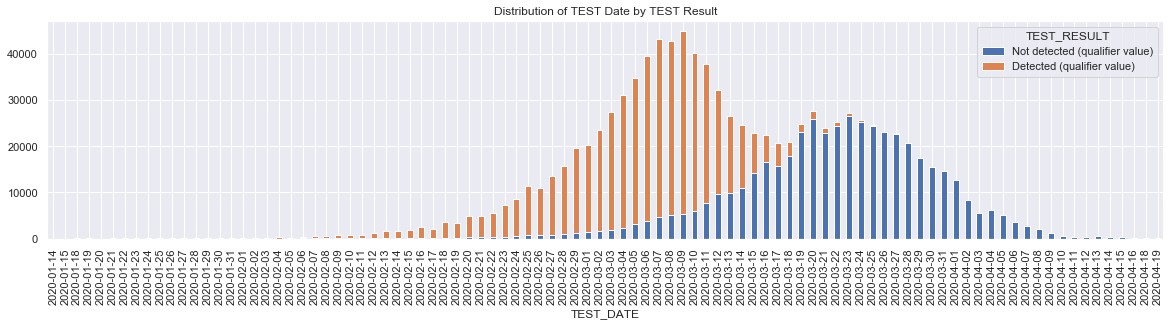

In [32]:
patients_tested_covid19_date_data = patients_tested_covid19_df.sort_values(by='TEST_DATE')
groupby_date = patients_tested_covid19_date_data.groupby('TEST_DATE').size()
groupby_date_result = patients_tested_covid19_date_data.groupby(['TEST_DATE', 'TEST_RESULT'])['AGE'].count().unstack('TEST_RESULT')
groupby_date_result[['Not detected (qualifier value)', 'Detected (qualifier value)']].plot.bar(title = 'Distribution of TEST Date by TEST Result', stacked=True, figsize=(20,4))

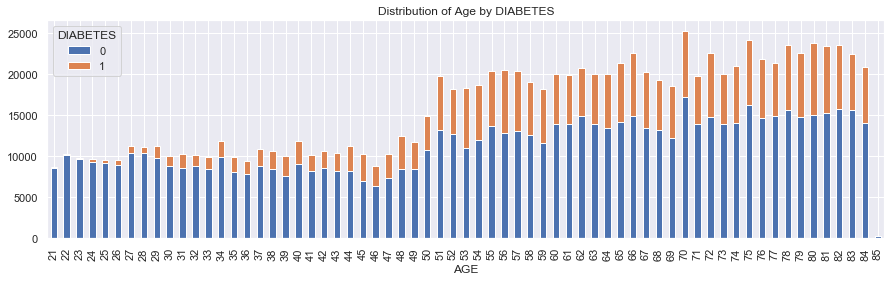

In [33]:
patients_tested_covid19_age_data = patients_tested_covid19_df.sort_values(by='AGE')
groupby_age = patients_tested_covid19_age_data.groupby('AGE').size()
groupby_age_survival = patients_tested_covid19_age_data.groupby(['AGE', 'DIABETES'])['AGE'].count().unstack('DIABETES')
groupby_age_survival[[0, 1]].plot.bar(title = 'Distribution of Age by DIABETES', stacked=True, figsize=(15,4))

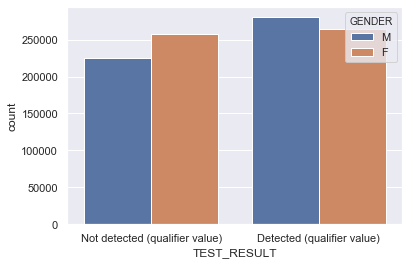

In [34]:
sns.countplot(x = 'TEST_RESULT', hue = 'GENDER', data = patients_tested_covid19_df)

# Preparing dataframe for modelling

In [35]:
patients_tested_covid19_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1026472 entries, 0 to 1026471
Data columns (total 16 columns):
Id                  1026472 non-null object
BIRTHDATE           1026472 non-null object
DEATHDATE           211414 non-null object
MARITAL             967999 non-null object
RACE                1026472 non-null object
ETHNICITY           1026472 non-null object
GENDER              1026472 non-null object
BW_VALUE            1026472 non-null object
BW_UNITS            1026472 non-null object
AGE                 1026472 non-null int64
TEST_DATE           1026472 non-null object
TEST_RESULT         1026472 non-null object
TRESULT_VALUE       1026472 non-null float64
DAYSHOSPITALIZED    1026472 non-null float64
DESCRIPTION         290345 non-null object
DIABETES            1026472 non-null int64
dtypes: float64(2), int64(2), object(12)
memory usage: 133.1+ MB


In [36]:
# Convert 'GENDER' variable to integer form!
patients_tested_covid19_df.loc[(patients_tested_covid19_df.GENDER == "M"),'GENDER'] = 0
patients_tested_covid19_df.loc[(patients_tested_covid19_df.GENDER == "F"),'GENDER'] = 1

# Convert 'ETHNICITY' variable to integer form!
patients_tested_covid19_df.loc[(patients_tested_covid19_df.ETHNICITY == "nonhispanic"),'ETHNICITY'] = 0
patients_tested_covid19_df.loc[(patients_tested_covid19_df.ETHNICITY == "hispanic"),'ETHNICITY'] = 1

# Convert 'RACE' variable to integer form!
patients_tested_covid19_df.loc[(patients_tested_covid19_df.RACE == "white"),'RACE'] = 1
patients_tested_covid19_df.loc[(patients_tested_covid19_df.RACE == "black"),'RACE'] = 2
patients_tested_covid19_df.loc[(patients_tested_covid19_df.RACE == "asian"),'RACE'] = 3
patients_tested_covid19_df.loc[(patients_tested_covid19_df.RACE == "other"),'RACE'] = 4
patients_tested_covid19_df.loc[(patients_tested_covid19_df.RACE == "native"),'RACE'] = 5

In [37]:
# We'll drop the following features for now, but more to follow...
patients_tested_covid19_df.drop(['MARITAL', 'DESCRIPTION'], axis = 1, inplace = True)

In [38]:
# We'll also drop the following features
patients_tested_covid19_df.drop(['Id', 'BIRTHDATE', 'DEATHDATE'], axis = 1, inplace = True)

In [39]:
# We'll also drop the following features
patients_tested_covid19_df.drop(['BW_UNITS', 'TEST_RESULT', 'TEST_DATE'], axis = 1, inplace = True)

In [40]:
patients_tested_covid19_df['BW_VALUE'] = pd.to_numeric(patients_tested_covid19_df['BW_VALUE'], downcast='integer')

# Modelling
#### Includes:
        1) Logistics Model
        2) SVM
        3) K-Fold Cross Validation for Logistics, Random Forest, SVM -SVC
        4) SVR

In [41]:
patients_tested_covid19_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1026472 entries, 0 to 1026471
Data columns (total 8 columns):
RACE                1026472 non-null int64
ETHNICITY           1026472 non-null int64
GENDER              1026472 non-null int64
BW_VALUE            1026472 non-null float64
AGE                 1026472 non-null int64
TRESULT_VALUE       1026472 non-null float64
DAYSHOSPITALIZED    1026472 non-null float64
DIABETES            1026472 non-null int64
dtypes: float64(3), int64(5)
memory usage: 70.5 MB


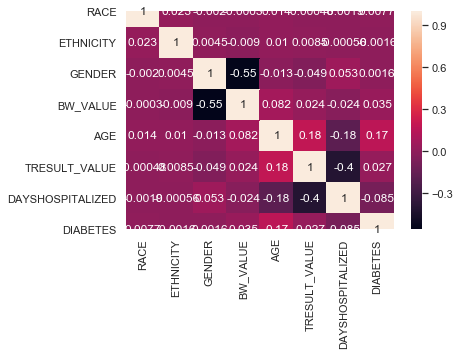

In [42]:
sns.heatmap(patients_tested_covid19_df.corr(), annot= True)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(patients_tested_covid19_df.drop(['TRESULT_VALUE'], axis = 1), 
                                                    patients_tested_covid19_df['TRESULT_VALUE'], test_size = 0.3, 
                                                    random_state = 2)

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718530 entries, 79159 to 875688
Data columns (total 7 columns):
RACE                718530 non-null int64
ETHNICITY           718530 non-null int64
GENDER              718530 non-null int64
BW_VALUE            718530 non-null float64
AGE                 718530 non-null int64
DAYSHOSPITALIZED    718530 non-null float64
DIABETES            718530 non-null int64
dtypes: float64(2), int64(5)
memory usage: 43.9 MB


In [47]:
X_train.shape

(718530, 7)

In [48]:
type(y_train)

pandas.core.series.Series

In [49]:
y_train

79159      0.0
1024065    1.0
536285     0.0
713685     1.0
558306     1.0
          ... 
437782     1.0
620104     0.0
203245     1.0
100879     1.0
875688     1.0
Name: TRESULT_VALUE, Length: 718530, dtype: float64

In [50]:
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression(max_iter = 10000)
logisticRegression.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
# Predict!
predictions = logisticRegression.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))

[[ 98990  45584]
 [ 51444 111924]]


In [53]:
accuracy = (98990 + 111924) / (98990 + 45584 + 51444 + 111924)
print('accuracy is: ' + str(round(accuracy, 2)))

accuracy is: 0.68


In [54]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307942 entries, 627884 to 725371
Data columns (total 7 columns):
RACE                307942 non-null int64
ETHNICITY           307942 non-null int64
GENDER              307942 non-null int64
BW_VALUE            307942 non-null float64
AGE                 307942 non-null int64
DAYSHOSPITALIZED    307942 non-null float64
DIABETES            307942 non-null int64
dtypes: float64(2), int64(5)
memory usage: 18.8 MB


In [55]:
logisticRegression.coef_

array([[-0.00746198,  0.05705855, -0.16648725, -0.00284552,  0.01568343,
        -0.13355345, -0.13497729]])

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.66      0.68      0.67    144574
         1.0       0.71      0.69      0.70    163368

    accuracy                           0.68    307942
   macro avg       0.68      0.68      0.68    307942
weighted avg       0.69      0.68      0.69    307942



In [38]:
# SVC - Support Vector Classifier
from sklearn.svm import SVC

# X_train, X_test, y_train, y_test = train_test_split(covid19_patients_df.drop(['SURVIVAL'], axis = 1), 
#                                                     covid19_patients_df['SURVIVAL'], random_state = 0)

In [39]:
svm = SVC(C=100, gamma='auto')

In [40]:
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.90


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

svm = SVC(C=100, gamma='auto')
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

In [42]:
# preprocessing using zero mean and unit variance scaling/ compressing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.90


In [44]:
y = covid19_patients_df['SURVIVAL']
X = covid19_patients_df.drop(['SURVIVAL'], axis = 1)

In [45]:
y

0        1
1        1
2        1
3        1
4        1
        ..
85155    0
85156    0
85157    0
85158    1
85159    1
Name: SURVIVAL, Length: 85160, dtype: int64

In [46]:
X

,RACE,ETHNICITY,GENDER,AGE,DAYSHOSPITALIZED,DIABETES
0,1,0,1,42,0.0,0
1,1,0,0,30,17.0,0
2,1,0,1,36,20.0,1
3,2,0,0,24,0.0,0
4,1,1,1,60,0.0,0
...,...,...,...,...,...,...
85155,1,0,0,56,7.0,1
85156,1,0,0,56,3.0,1
85157,1,0,0,56,0.0,1
85158,1,0,1,68,0.0,1


In [50]:
from sklearn.model_selection import cross_val_score

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
scores = cross_val_score(LogisticRegression(), X, y)
print('Cross-Validation Accuracy Scores for Logistic Regression', scores)

Cross-Validation Accuracy Scores for Logistic Regression [0.83027442 0.82995737 0.83245262]


In [58]:
scores = cross_val_score(LogisticRegression(), X, y, cv=5)
print('Cross-Validation Accuracy Scores for Logistic Regression', scores)

Cross-Validation Accuracy Scores for Logistic Regression [0.83085775 0.83115129 0.82979098 0.83107275 0.83165991]


In [52]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(n_estimators=40), X, y)
print('Cross-Validation Accuracy Scores for Random Forest Classifier', scores)

Cross-Validation Accuracy Scores for Random Forest Classifier [0.89428259 0.89283827 0.89248221]


In [53]:
scores = cross_val_score(RandomForestClassifier(n_estimators=15), X, y)
print('Cross-Validation Accuracy Scores for Random Forest Classifier', scores)

Cross-Validation Accuracy Scores for Random Forest Classifier [0.89322577 0.8914644  0.89279927]


In [60]:
scores = cross_val_score(RandomForestClassifier(n_estimators=35), X, y, cv=5)
print('Cross-Validation Accuracy Scores for Random Forest Classifier', scores)

Cross-Validation Accuracy Scores for Random Forest Classifier [0.89467504 0.89080021 0.89419915 0.89254888 0.89718748]


In [57]:
scores = cross_val_score(SVC(), X, y)
print('Cross-Validation Accuracy Scores for SVM', scores)

Cross-Validation Accuracy Scores for SVM [0.90182126 0.9002008  0.90065525]


In [ ]:
scores = cross_val_score(SVC(), X, y, cv=5)
print('Cross-Validation Accuracy Scores for SVM', scores)

# Evaluate Results 